# Inference

Testing the inference API

In [1]:
from glob import glob
import random
import rasterio as rio
import numpy as np
import requests
import matplotlib.pyplot as plt
import io
import json
from matplotlib.colors import ListedColormap
from PIL import Image
import skimage

In [2]:
images = glob('samples/*.tif')
# images = glob('samples/*.jpg')

In [5]:
sample = random.choice(images)
sample

'samples/16078870_15.tif'

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


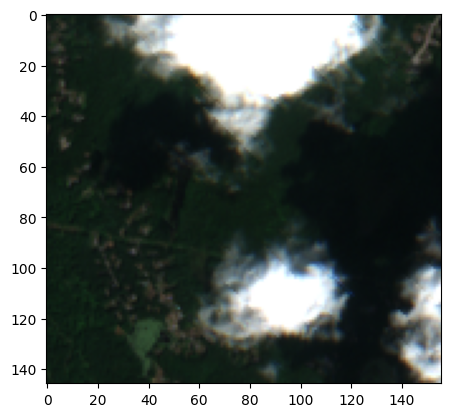

In [6]:
ds = rio.open(sample)
rgb = (ds.read([4,3,2]) / 4000).clip(0, 1).transpose(1, 2, 0)
plt.imshow(rgb)

# rgb = skimage.io.imread(sample)
# plt.imshow(rgb)

plt.show()

In [102]:
# skimage.io.imsave('samples/sample.png', (rgb * 255).astype(np.uint8))
# rgb = skimage.io.imread('samples/sample.png')
# plt.imshow(rgb)
# plt.show()

(1, 146, 156)


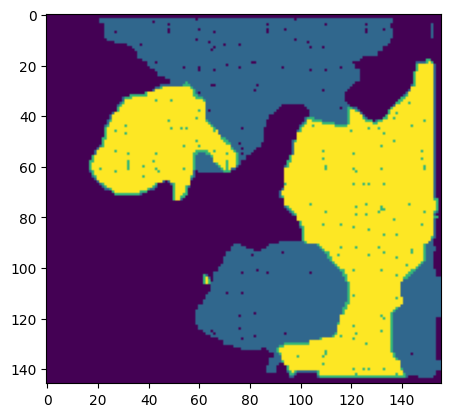

In [39]:
# url = 'http://localhost:8001/s2-roads'
# url = 'http://localhost:8001/hr-roads'
url = 'http://localhost:8001/s2-clouds'


res = requests.post(url, files={'image': open(sample, 'rb')})
# res = requests.post(url, files={'image': open('samples/sample.png', 'rb')})
if res.status_code != 200:
	print(res.json())

with rio.open(io.BytesIO(res.content)) as src:
    array = src.read()
print(array.shape)

ix = 0
plt.imshow(array[ix])

# image_bytes = io.BytesIO(res.content)
# img = Image.open(image_bytes)
# mask = np.array(img) 
# plt.imshow(mask)

ValueError: alpha must be between 0 and 1, inclusive, but min is 0, max is 3

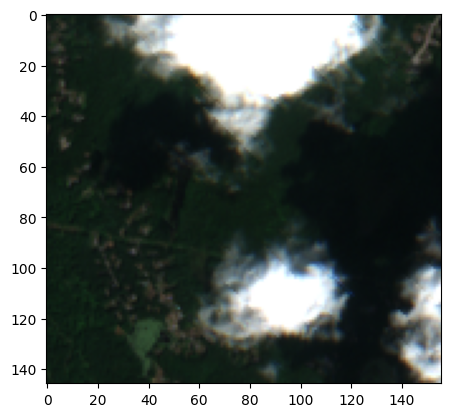

In [40]:
ix = 0
plt.imshow(rgb)
plt.imshow(array[ix], alpha=array[ix], cmap='Reds', vmin=0, vmax=1)
plt.show()